In [1]:
using MimiCIAM
using Mimi
using Plots
using CSV
using DataFrames
using NetCDF
using StatsBase
using KernelDensity

In [2]:
include("../downscaling.jl")

downscale_brick (generic function with 4 methods)

In [3]:
ais_t1 = CSV.read("../dataFiles/component_csv/projections_antarctic_t15_yr2100.csv", DataFrame)
gsic_t1 = CSV.read("../dataFiles/component_csv/projections_glaciers_t15_yr2100.csv", DataFrame)
gis_t1 = CSV.read("../dataFiles/component_csv/projections_greenland_t15_yr2100.csv", DataFrame)
lws_t1 = CSV.read("../dataFiles/component_csv/projections_landwater_storage_sl_t15_yr2100.csv", DataFrame)
te_t1 = CSV.read("../dataFiles/component_csv/projections_thermal_t15_yr2100.csv", DataFrame)
gmsl_t1 = CSV.read("../dataFiles/component_csv/projections_gmsl_t15_yr2100.csv", DataFrame)

ais_t2 = CSV.read("../dataFiles/component_csv/projections_antarctic_t2_yr2100.csv", DataFrame)
gsic_t2 = CSV.read("../dataFiles/component_csv/projections_glaciers_t2_yr2100.csv", DataFrame)
gis_t2 = CSV.read("../dataFiles/component_csv/projections_greenland_t2_yr2100.csv", DataFrame)
lws_t2 = CSV.read("../dataFiles/component_csv/projections_landwater_storage_sl_t2_yr2100.csv", DataFrame)
te_t2 = CSV.read("../dataFiles/component_csv/projections_thermal_t2_yr2100.csv", DataFrame)
gmsl_t2 = CSV.read("../dataFiles/component_csv/projections_gmsl_t2_yr2100.csv", DataFrame)

ais_t3 = CSV.read("../dataFiles/component_csv/projections_antarctic_t3_yr2100.csv", DataFrame)
gsic_t3 = CSV.read("../dataFiles/component_csv/projections_glaciers_t3_yr2100.csv", DataFrame)
gis_t3 = CSV.read("../dataFiles/component_csv/projections_greenland_t3_yr2100.csv", DataFrame)
lws_t3 = CSV.read("../dataFiles/component_csv/projections_landwater_storage_sl_t3_yr2100.csv", DataFrame)
te_t3 = CSV.read("../dataFiles/component_csv/projections_thermal_t3_yr2100.csv", DataFrame)
gmsl_t3 = CSV.read("../dataFiles/component_csv/projections_gmsl_t3_yr2100.csv", DataFrame)

ais_t4 = CSV.read("../dataFiles/component_csv/projections_antarctic_t4_yr2100.csv", DataFrame)
gsic_t4 = CSV.read("../dataFiles/component_csv/projections_glaciers_t4_yr2100.csv", DataFrame)
gis_t4 = CSV.read("../dataFiles/component_csv/projections_greenland_t4_yr2100.csv", DataFrame)
lws_t4 = CSV.read("../dataFiles/component_csv/projections_landwater_storage_sl_t4_yr2100.csv", DataFrame)
te_t4 = CSV.read("../dataFiles/component_csv/projections_thermal_t4_yr2100.csv", DataFrame)
gmsl_t4 = CSV.read("../dataFiles/component_csv/projections_gmsl_t4_yr2100.csv", DataFrame)


Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.177794,-0.180469,-0.29796,-0.233172,-0.174405,-0.183554,-0.207515,-0.192877,-0.166085,-0.160087,-0.165677,-0.189367,-0.0787807,-0.176693,-0.111222,-0.226678,-0.165386,-0.171196,-0.20397,-0.248293,-0.18881,-0.189503,-0.28459,-0.181515,-0.200444,-0.0658338,-0.174809,-0.212849,-0.118965,-0.15542,-0.209149,-0.146497,-0.196586,-0.181969,-0.147082,-0.143318,-0.234206,-0.214569,-0.185255,-0.16529,-0.276743,-0.167905,-0.186779,-0.167984,-0.217241,-0.249262,-0.217882,-0.214902,-0.30745,-0.170948,-0.115774,-0.204961,-0.236142,-0.183175,-0.136627,-0.128963,-0.113979,-0.281082,-0.254173,-0.277482,-0.186155,-0.28258,-0.135045,-0.134803,-0.198336,-0.220668,-0.271683,-0.21346,-0.225744,-0.158866,-0.252798,-0.228004,-0.104896,-0.260891,-0.238491,-0.206205,-0.226817,-0.235583,-0.213579,-0.136101,-0.160712,-0.128346,-0.189457,-0.205276,-0.192845,-0.245949,-0.252454,-0.200085,-0.196539,-0.233466,-0.214217,-0.135426,-0.168007,-0.214475,-0.113308,-0.204504,-0.109075,-0.230322,-0.0642265,-0.231958,⋯
2,-0.168088,-0.223932,-0.248422,-0.218211,-0.150753,-0.125553,-0.250325,-0.245895,-0.213232,-0.160422,-0.159001,-0.18955,-0.109907,-0.193994,-0.130347,-0.223114,-0.222594,-0.145502,-0.150199,-0.227672,-0.235076,-0.14504,-0.226316,-0.153275,-0.168846,-0.103049,-0.223389,-0.199275,-0.201831,-0.17529,-0.160117,-0.185734,-0.226753,-0.14229,-0.151484,-0.177248,-0.252636,-0.217727,-0.197727,-0.243636,-0.219129,-0.215513,-0.20591,-0.202954,-0.247653,-0.258503,-0.234194,-0.22561,-0.233391,-0.202538,-0.162309,-0.224204,-0.21617,-0.228827,-0.199112,-0.138875,-0.164328,-0.237951,-0.254703,-0.20962,-0.195453,-0.217859,-0.183358,-0.125539,-0.215196,-0.241314,-0.23635,-0.254726,-0.20128,-0.127284,-0.243245,-0.166433,-0.141013,-0.21789,-0.191525,-0.230627,-0.229288,-0.225309,-0.207061,-0.174876,-0.223636,-0.172248,-0.253029,-0.170256,-0.234537,-0.225518,-0.222763,-0.180734,-0.289476,-0.20419,-0.244351,-0.167233,-0.180095,-0.176864,-0.0861539,-0.234212,-0.160344,-0.20671,-0.111555,-0.201751,⋯
3,-0.186708,-0.200245,-0.2199,-0.205584,-0.153433,-0.123197,-0.209201,-0.211247,-0.223947,-0.136569,-0.145334,-0.191085,-0.114816,-0.160381,-0.0832098,-0.245857,-0.16899,-0.158765,-0.187886,-0.234302,-0.236813,-0.114606,-0.182323,-0.181232,-0.225049,-0.106287,-0.223257,-0.255069,-0.155821,-0.160831,-0.178793,-0.161013,-0.270036,-0.214417,-0.187165,-0.195009,-0.22958,-0.198826,-0.164307,-0.261858,-0.236797,-0.186428,-0.247913,-0.261213,-0.209144,-0.215773,-0.215391,-0.248331,-0.239215,-0.228275,-0.143263,-0.194099,-0.199475,-0.200317,-0.190415,-0.173548,-0.180871,-0.191679,-0.17831,-0.250949,-0.17395,-0.207539,-0.154837,-0.101622,-0.22747,-0.235885,-0.251939,-0.244981,-0.235337,-0.155464,-0.240456,-0.225135,-0.115415,-0.227836,-0.219096,-0.254347,-0.209869,-0.208211,-0.199475,-0.164406,-0.178692,-0.

In [4]:
size(ais_t3)[2]

25446

In [5]:
#Set LatLong coordinates
lonlat_nyc = [(-73.892,40.605)]
#Thresh 1.5
ensembles_run = 1:(size(gmsl_t1)[2])
comp_t1 = (1850:2300, Matrix(ais_t1), Matrix(gsic_t1), Matrix(gis_t1), Matrix(te_t1), Matrix(lws_t1), Matrix(gmsl_t1) )
result_t1 = downscale_brick(comp_t1, lonlat_nyc, ensembles_run, 2000, 2100, 5)

run_t1 = result_t1[1][:,:,1]
#CSV.write("../dataFiles/lslr/lslr_t1.csv", DataFrame(run_t1, :auto))

# Thresh 2
ensembles_run = 1:(size(gmsl_t2)[2])
comp_t2 = (1850:2300, Matrix(ais_t2), Matrix(gsic_t2), Matrix(gis_t2), Matrix(te_t2), Matrix(lws_t2), Matrix(gmsl_t2) )
result_t2 = downscale_brick(comp_t2, lonlat_nyc, ensembles_run, 2000, 2100, 5)

run_t2 = result_t2[1][:,:,1]
#CSV.write("../dataFiles/lslr/lslr_t2.csv", DataFrame(run_t2, :auto))

# Thresh 3
ensembles_run = 1:(size(gmsl_t3)[2])
comp_t3 = (1850:2300, Matrix(ais_t3), Matrix(gsic_t3), Matrix(gis_t3), Matrix(te_t3), Matrix(lws_t3), Matrix(gmsl_t3) )
result_t3 = downscale_brick(comp_t3, lonlat_nyc, ensembles_run, 2000, 2100, 5)

run_t3 = result_t3[1][:,:,1]
#CSV.write("../dataFiles/lslr/lslr_t3.csv", DataFrame(run_t3, :auto))

# thresh 4
ensembles_run = 1:(size(gmsl_t4)[2])
comp_t4 = (1850:2300, Matrix(ais_t4), Matrix(gsic_t4), Matrix(gis_t4), Matrix(te_t4), Matrix(lws_t4), Matrix(gmsl_t4) )
result_t4 = downscale_brick(comp_t4, lonlat_nyc, ensembles_run, 2000, 2100, 5)

run_t4 = result_t4[1][:,:,1]
#CSV.write("../dataFiles/lslr/lslr_t4.csv", DataFrame(run_t4, :auto))



32439×21 Matrix{Float64}:
 0.0  0.014309   0.0309269  0.0430984  …  0.335538  0.348594  0.369117
 0.0  0.0108233  0.0261109  0.0428991     0.307126  0.31723   0.333529
 0.0  0.0173115  0.0273761  0.0446683     0.26811   0.276816  0.292248
 0.0  0.0189069  0.0311181  0.054044      0.305581  0.321279  0.337883
 0.0  0.0146871  0.0298301  0.045745      0.369997  0.389103  0.406919
 0.0  0.0122881  0.0211392  0.0402768  …  0.391363  0.420211  0.440513
 0.0  0.0183727  0.0307034  0.0498138     0.281828  0.296987  0.31668
 0.0  0.0155947  0.0269615  0.0401726     0.257986  0.271449  0.287085
 0.0  0.0137338  0.0257204  0.0438544     0.325561  0.344553  0.362202
 0.0  0.0136063  0.0294254  0.0436767     0.31351   0.330199  0.350952
 ⋮                                     ⋱                      ⋮
 0.0  0.0123563  0.0251921  0.0401661  …  0.904103  1.00602   1.11778
 0.0  0.0107796  0.024731   0.0383036     0.748818  0.851616  0.9507
 0.0  0.0155549  0.0271414  0.0506974     1.07884   1.19767   

In [6]:
u = []
vals = []
for i in 1:10091
    if run_t2[i,21] > 1
        push!(vals,i)
        push!(u,run_t2[i,21])
    end
end
vals


6-element Vector{Any}:
 1774
 3482
 4056
 5329
 6130
 6141

This threshold number should either be 1, 2, 3, or 4.

In [7]:
function getvals(thresh_num)
    vals = []
    if thresh_num == 1
        for i in 1:size(gmsl_t1)[2]
            if run_t1[i,21] > 1
                push!(vals,i)
            end
        end
        return vals
    elseif thresh_num == 2
        for i in 1:size(gmsl_t2)[2]
            if run_t2[i,21] > 1
                push!(vals,i)
            end
        end
        return vals
    elseif thresh_num == 3
        for i in 1:size(gmsl_t3)[2]
            if run_t3[i,21] > 1
                push!(vals,i)
            end
        end
        return vals
    elseif thresh_num == 4
        for i in 1:size(gmsl_t4)[2]
            if run_t4[i,21] > 1
                push!(vals,i)
            end
        end
        return vals
    end
end
getvals(2)

6-element Vector{Any}:
 1774
 3482
 4056
 5329
 6130
 6141

In [8]:
A = Array{Float64,2}(undef,20,1)
B = run_t3[2,1:20]
C = findall(A.<=20)
A[C] = B
T = []
function getG(index)
    
    mimi_t3 = MimiCIAM.get_model(initfile = "nyc_init.csv")
    B = run_t3[index,1:20]
    C = findall(A.<=20)
    A[C] = B
    update_param!(mimi_t3,:slrcost,:lslr,A)
    update_param!(mimi_t3, :slrcost, :ntsteps, 20)
    run(mimi_t3)
    G = getdataframe(mimi_t3, :slrcost=>:NPVNoAdapt)
    H = Matrix(G)
    return H

end
for i in 1:32
    #rng = MersenneTwister(i)
    n = rand(Int8, 1, 25446)
    t = abs(n[i])
    H = getG(i)
    if H[15,3] > 40
        push!(T,H[:,3])
    end
end
T


Any[]

In [9]:

Array{Float64}(rand(Float64, (20, 1)))

20×1 Matrix{Float64}:
 0.019842006725053096
 0.15374397654427208
 0.9721678224652506
 0.5554045907392382
 0.8106151841819738
 0.9862276542711128
 0.30783875781609504
 0.46988429878317106
 0.039987950006534545
 0.4902977052782189
 0.04759535993869246
 0.9880913004704241
 0.8150526342861459
 0.7847356845486118
 0.36914123589274883
 0.5699841197458839
 0.8960279813336882
 0.5058294203824807
 0.19799591100491276
 0.6122206460835882

In [10]:
T = []
A = Array{Float64}(rand(Float64, (20, 1)))
function getG(index)
    
    mimi_t3 = MimiCIAM.get_model(initfile = "nyc_init.csv")
    B = run_t3[index,1:20]
    C = findall(A.<=20)
    A[C] = B
    update_param!(mimi_t3,:slrcost,:lslr,A)
    update_param!(mimi_t3, :slrcost, :ntsteps, 20)
    run(mimi_t3)
    G = getdataframe(mimi_t3, :slrcost=>:NPVNoAdapt)
    H = Matrix(G)
    return H

end
for i in 1:32
    #rng = MersenneTwister(i)
    n = rand(Int8, 1, 25446)
    t = abs(n[i])
    r = vals[i]
    H = getG(r)
    push!(T,H[:,3])
end
T



BoundsError: BoundsError: attempt to access 6-element Vector{Any} at index [7]

In [11]:
T[1]

20-element Vector{Any}:
  1.2626065263426671
  1.2626065263426671
  1.2626065263426671
  1.2626065263426671
  5.4077745540218904
  5.4077745540218904
  5.4077745540218904
  5.4077745540218904
  5.4077745540218904
 10.447083709303097
 10.447083709303097
 10.447083709303097
 10.447083709303097
 10.447083709303097
  8.386720956910095
  8.386720956910095
  8.386720956910095
  8.386720956910095
  5.182618617024733
  5.182618617024733

In [12]:
for i in 1:32
    y = T[i]
    x = range(2000, 5, length=2100)
    b = plot!(y, legend = false)
end
title!("NPVNoAdapt Cost of New York for Threshold 3 degrees")
yaxis!("Millions of Dollars")
xaxis!("Year")

BoundsError: BoundsError: attempt to access 6-element Vector{Any} at index [7]

In [13]:
A = Array{Float64}(rand(Float64, (20, 1)))
function getP(index)
    
    mimi_t3 = MimiCIAM.get_model(initfile = "nyc_init.csv")
    B = run_t3[index,1:20]
    C = findall(A.<=20)
    A[C] = B
    update_param!(mimi_t3,:slrcost,:lslr,A)
    update_param!(mimi_t3, :slrcost, :ntsteps, 20)
    run(mimi_t3)
    G = getdataframe(mimi_t3, :slrcost=>:NPVOptimal)
    H = Matrix(G)
    return H[1,2]

end
fre = []
for i in 1:length(vals)
    n = vals[i]
    push!(fre,getP(n))
end


In [14]:
fre

6-element Vector{Any}:
 0.23567421361693816
 0.24482128309365245
 0.2226117279439452
 0.21977825475396642
 0.24145661109911148
 0.23684555634769067

In [15]:
A = Array{Float64}(rand(Float64, (20, 1)))
function getP(index)
    
    mimi_t2 = MimiCIAM.get_model(initfile = "nyc_init.csv")
    B = run_t2[index,1:20]
    C = findall(A.<=20)
    A[C] = B
    update_param!(mimi_t2,:slrcost,:lslr,A)
    update_param!(mimi_t2, :slrcost, :ntsteps, 20)
    run(mimi_t2)
    G = getdataframe(mimi_t2, :slrcost=>:NPVOptimal)
    H = Matrix(G)
    return H[1,2]

end
sop = []
for i in 1:40
    push!(sop,getP(i))
end


In [18]:
function getvals_npv(num_of_segs, thresh_num)
    A = Array{Float64}(rand(Float64, (20, 1)))
    function getP(index)
        model_run = MimiCIAM.get_model(initfile = "nyc_init.csv")
        if thresh_num == 1
            B = run_t1[index, 1:20]
        elseif thresh_num == 2
            B = run_t2[index, 1:20]
        elseif thresh_num == 3
            B = run_t3[index, 1:20]
        elseif thresh_num == 4
            B = run_t4[index, 1:20]
        end
        C = findall(A.<=20)
        A[C] = B
        update_param!(model_run,:slrcost,:lslr,A)
        update_param!(model_run, :slrcost, :ntsteps, 20)
        run( model_run)
        G = getdataframe(model_run, :slrcost=>:NPVOptimal)
        H = Matrix(G)
        return H[1,2]
    end

    ans_npv = []
    for i in 1:num_of_segs
        push!(ans_npv,getP(i))
    end
    return ans_npv
end
getvals_npv(20,3)

20-element Vector{Any}:
 0.25907956157001033
 0.23630582321757698
 0.22933993049941778
 0.25833363560003453
 0.26989338341333863
 0.27050303032003864
 0.23699202904475886
 0.21797853688951266
 0.24963485368328334
 0.24546676762804448
 0.25525990677703997
 0.26955688424867746
 0.19815417093191912
 0.2704092177579731
 0.24394327950166797
 0.2217324167369197
 0.22579722678403205
 0.24938081424173983
 0.2039159927537067
 0.261022528235794

In [19]:
r4 = Vector{Float64}(getvals_npv(100,4))
r3 = Vector{Float64}(getvals_npv(100,3))
r2 = Vector{Float64}(getvals_npv(100,2))
r15 = Vector{Float64}(getvals_npv(100,1))
getvals_npv(20,1)

In [39]:
k4 = kde(r4)
k3 = kde(r3)
k2 = kde(r2)
k15 = kde(r15)
r4

100-element Vector{Float64}:
 0.25907956157001033
 0.23630582321757698
 0.22933993049941778
 0.25833363560003453
 0.26989338341333863
 0.27050303032003864
 0.23699202904475886
 0.21797853688951266
 0.24963485368328334
 0.24546676762804448
 ⋮
 0.24595225484008537
 0.21203154990094308
 0.20833479036019315
 0.20897372660804342
 0.26019170344594367
 0.24234337425536503
 0.2495275739629978
 0.2575843138438816
 0.2339821471200987

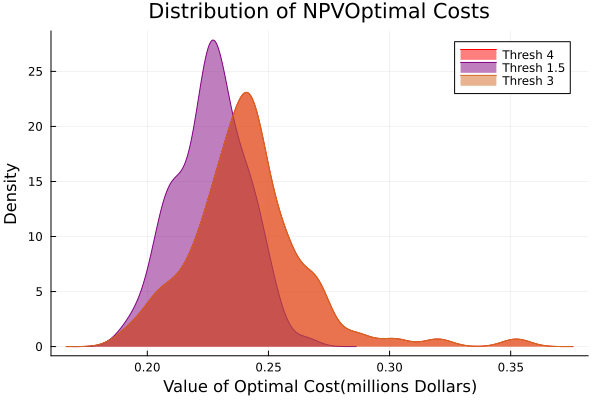

In [46]:
p1 =  plot(k4.x, k4.density, label = "Thresh 4", fill = (0, 0.5), color = :red)
p2 = plot(p1,k15.x, k15.density, label = "Thresh 1.5", fill = (0, 0.5), color = :purple)
p3 = plot(p2,k3.x, k3.density, label = "Thresh 3", fill = (0, 0.5), color = :chocolate)
#plot(k2.x, k4.density, label = "Thresh 2", fill = (0, 0.5), color = :dodgerblue)
title!(string("Distribution of NPVOptimal Costs"))
xlabel!("Value of Optimal Cost(millions Dollars)")
ylabel!("Density")

Running MimiCIAM with your new SLR:
1. initialize/build your model: your_model_name = MimiCIAM.get_model(...)
    
2. update the parameter:  update_param!(your_model_name, :slrcost, :lslr, your_new_slr_array)  
(make sure that you a running only the segment that you have slr for!)  
you may need to alter timesteps of MimiCIAM to match the ones you have downscaled (the # of column in lslr dataframe)  
to update timesteps, call: update_param!(your_model_name, :slrcost, :ntsteps, your_new_time_step)
    

3. call run again: run(your_model_name)

4. get your output!

5. Repeat! You will have to loop through your trials and update the slr param each time, but you should only have to  
build the model once, unless you want to change ssp, then you will have to initialize and build and new model with  
an init_file
